# Доверительные интервалы для среднего

Для 61 большого города в Англии и Уэльсе известны средняя годовая смертность на 100000 населения (по данным 1958–1964) и концентрация кальция в питьевой воде (в частях на миллион). Чем выше концентрация кальция, тем жёстче вода. Города дополнительно поделены на северные и южные.

In [1]:
import numpy as np
import pandas as pd
from scipy.stats import norm
from statsmodels.stats.weightstats import _tconfint_generic

In [2]:
data = pd.read_csv('../data/water.txt', sep='\t')

In [3]:
data

,location,town,mortality,hardness
0,South,Bath,1247,105
1,North,Birkenhead,1668,17
2,South,Birmingham,1466,5
3,North,Blackburn,1800,14
4,North,Blackpool,1609,18
...,...,...,...,...
56,South,Walsall,1527,60
57,South,West Bromwich,1627,53
58,South,West Ham,1486,122
59,South,Wolverhampton,1485,81



Постройте 95% доверительный интервал для средней годовой смертности в больших городах. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [4]:
_tconfint_generic(data.mortality.mean(), data.mortality.std(ddof=1)/np.sqrt(len(data)), len(data)-1, 0.05, 'two-sided')

(1476.0833413552848, 1572.2117406119285)

На данных из предыдущего вопроса постройте 95% доверительный интервал для средней годовой смертности по всем южным городам. Чему равна его верхняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [5]:
_tconfint_generic(data[data.location == 'South'].mortality.mean(), \
                  data[data.location == 'South'].mortality.std(ddof=1) / np.sqrt(len(data[data.location == 'South'])),\
                  len(data[data.location == 'South']) - 1, 0.05, 'two-sided')

(1320.1517462936238, 1433.463638321761)

На тех же данных постройте 95% доверительный интервал для средней годовой смертности по всем северным городам. Пересекается ли этот интервал с предыдущим? Как вы думаете, какой из этого можно сделать вывод?

In [6]:
_tconfint_generic(data[data.location == 'North'].mortality.mean(), \
                  data[data.location == 'North'].mortality.std(ddof=1) / np.sqrt(len(data[data.location == 'North'])),\
                  len(data[data.location == 'North']) - 1, 0.05, 'two-sided')

(1586.5605251961385, 1680.6394748038613)

Пересекаются ли 95% доверительные интервалы для средней жёсткости воды в северных и южных городах?

In [7]:
_tconfint_generic(data[data.location == 'South'].hardness.mean(), \
                  data[data.location == 'South'].hardness.std(ddof=1) / np.sqrt(len(data[data.location == 'South'])),\
                  len(data[data.location == 'South']) - 1, 0.05, 'two-sided')
_tconfint_generic(data[data.location == 'North'].hardness.mean(), \
                  data[data.location == 'North'].hardness.std(ddof=1) / np.sqrt(len(data[data.location == 'North'])), \
                  len(data[data.location == 'North']) - 1, 0.05, 'two-sided')

(21.42248728572426, 39.37751271427574)

Вспомним формулу доверительного интервала для среднего нормально распределённой случайной величины с дисперсией σ^2:

<img src="../data/1.png">

При σ=1 какой нужен объём выборки, чтобы на уровне доверия 95% оценить среднее с точностью ± 0.1?

In [8]:
np.ceil((norm.ppf(1-0.05/2) / 0.1)**2)

385.0

# Доверительные интервалы для долей

Большая часть млекопитающих неспособны во взрослом возрасте переваривать лактозу, содержащуюся в молоке. У людей за расщепление лактозы отвечает фермент лактаза, кодируемый геном LCT. У людей с вариантом 13910T этого гена лактаза продолжает функционировать на протяжении всей жизни. Распределение этого варианта гена сильно варьируется в различных генетических популяциях.

Из 50 исследованных представителей народа майя вариант 13910T был обнаружен у одного. Постройте нормальный 95% доверительный интервал для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [9]:
from statsmodels.stats.proportion import proportion_confint

In [10]:
def my_proportion_confint(count, nobs, alpha=0.05, method='normal'):
    q_ = count * 1. / nobs
    alpha_2 = 0.5 * alpha
    std_ = np.sqrt(q_ * (1 - q_) / nobs)
    dist = norm.isf(alpha / 2.) * std_
    ci_low = q_ - dist
    ci_upp = q_ + dist
    return ci_low, ci_upp

In [11]:
my_proportion_confint(1,50)

(-0.018805307081790987, 0.05880530708179099)

В условиях предыдущей задачи постройте 95% доверительный интервал Уилсона для доли носителей варианта 13910T в популяции майя. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

In [12]:
proportion_confint(1, 50, alpha=0.05, method='wilson')

(0.003539259271646236, 0.10495443589637815)

Пусть в популяции майя действительно 2% носителей варианта 13910T, как в выборке, которую мы исследовали. Какой объём выборки нужен, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью 
±0.01 на уровне доверия 95%?

In [13]:
from statsmodels.stats.proportion import samplesize_confint_proportion

In [14]:
np.ceil(samplesize_confint_proportion(0.02, 0.01))

753.0

Постройте график зависимости объёма выборки, необходимого для оценки для доли носителей гена 13910T с точностью ±0.01 на уровне доверия 95%, от неизвестного параметра p. Посмотрите, при каком значении p нужно больше всего испытуемых. Как вы думаете, насколько вероятно, что выборка, которую мы анализируем, взята из случайной величины с этим значением параметра?

Как бы вы не ответили на последний вопрос, рассмотреть объём выборки, необходимый при таком p, всё равно полезно — это даёт максимально пессимистичную оценку необходимого объёма выборки.

Какой объём выборки нужен в худшем случае, чтобы с помощью нормального интервала оценить долю носителей гена 13910T с точностью ±0.01 на уровне доверия 95%?

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [22]:
proportion = np.linspace(0, 1, 101)

n_samples = np.empty(proportion.shape)
for i, p in enumerate(proportion):
    n_samples[i] = int(np.ceil(samplesize_confint_proportion(p, 0.01)))

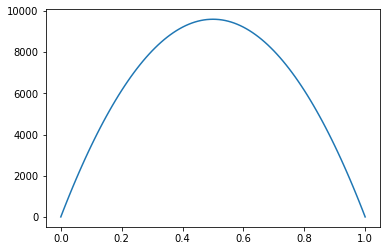

In [18]:
plt.plot(proportion, n_samples);

In [19]:
n_samples[np.where(proportion == 0.5)]

array([9604.])

In [23]:
np.ceil(samplesize_confint_proportion(0.5, 0.01))

9604.0

# Доверительные интервалы

Давайте уточним правило трёх сигм. Утверждение: 99.7% вероятностной массы случайной величины $X\sim N\left(\mu,\sigma^2\right)$ лежит в интервале $\mu\pm c \cdot \sigma$. Чему равно точное значение константы $c$? Округлите ответ до четырёх знаков после десятичной точки.

In [27]:
print('c =', round(float(norm.ppf(1-(1-0.997)/2)), 4))

c = 2.9677


В пятилетнем рандомизированном исследовании Гарвардской медицинской школы 11037 испытуемых через день принимали аспирин, а ещё 11034 — плацебо. Исследование было слепым, то есть, испытуемые не знали, что именно они принимают.

За 5 лет инфаркт случился у 104 испытуемых, принимавших аспирин, и у 189 принимавших плацебо.

Оцените, насколько вероятность инфаркта снижается при приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [29]:
aspirin_data = np.array( [1 if i<104 else 0 for i in range(11037)] )
placebo_data = np.array( [1 if i<189 else 0 for i in range(11034)] )

prob_infarction_aspirin = aspirin_data.sum() / aspirin_data.shape[0]
prob_infarction_placebo = placebo_data.sum() / placebo_data.shape[0]
print('Infarction probability (aspirin): %.4f' % prob_infarction_aspirin)
print('Infarction probability (placebo): %.4f' % prob_infarction_placebo)
print('Infarction probability decrease: %.4f' % (prob_infarction_placebo - prob_infarction_aspirin))

Infarction probability (aspirin): 0.0094
Infarction probability (placebo): 0.0171
Infarction probability decrease: 0.0077


Постройте теперь 95% доверительный интервал для снижения вероятности инфаркта при приёме аспирина. Чему равна его верхняя граница? Округлите ответ до четырёх знаков после десятичной точки.

In [32]:
def proportions_confint_diff_ind(sample1, sample2, alpha=0.05):    
    z = norm.ppf(1 - alpha / 2.)   
    p1 = float(sum(sample1)) / len(sample1)
    p2 = float(sum(sample2)) / len(sample2)
    
    left_boundary = (p1 - p2) - z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    right_boundary = (p1 - p2) + z * np.sqrt(p1 * (1 - p1)/ len(sample1) + p2 * (1 - p2)/ len(sample2))
    
    return (left_boundary, right_boundary)

In [35]:
print('Confidence interval: [%.4f, %.4f]' % proportions_confint_diff_ind(placebo_data, aspirin_data))

Confidence interval: [0.0047, 0.0107]


Продолжим анализировать данные эксперимента Гарвардской медицинской школы.

Для бернуллиевских случайных величин X∼Ber(p) часто вычисляют величину p(1-p), которая называется шансами (odds). Чтобы оценить шансы по выборке, вместо p нужно подставить $\hat{p}$. Например, шансы инфаркта в контрольной группе, принимавшей плацебо, можно оценить как

<img src="../data/2.png">

Оцените, во сколько раз понижаются шансы инфаркта при регулярном приёме аспирина. Округлите ответ до четырёх знаков после десятичной точки.

In [36]:
def odds(data):
    p = data.sum() / data.shape[0]
    return p / (1 - p)

In [37]:
odds_aspirin = odds(aspirin_data)
print('Odds aspirin: %.4f' % odds_aspirin)
odds_placebo = odds(placebo_data)
print('Odds aspirin: %.4f' % odds_placebo)

Odds aspirin: 0.0095
Odds aspirin: 0.0174


In [38]:
print('Times decrease of infarction: %.4f' % (odds_placebo / odds_aspirin))

Times decrease of infarction: 1.8321


Величина, которую вы оценили в предыдущем вопросе, называется отношением шансов. Постройте для отношения шансов 95% доверительный интервал с помощью бутстрепа. Чему равна его нижняя граница? Округлите ответ до 4 знаков после десятичной точки.

Чтобы получить в точности такой же доверительный интервал, как у нас:

- составьте векторы исходов в контрольной и тестовой выборках так, чтобы в начале шли все единицы, а потом все нули;
- установите random seed=0;
- сделайте по 1000 псевдовыборок из каждой группы пациентов с помощью функции get_bootstrap_samples.

In [39]:
def get_bootstrap_samples(data, n_samples):
    indices = np.random.randint(0, len(data), (n_samples, len(data)))
    samples = data[indices]
    return samples

def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100 * (1 - alpha / 2.)])
    return boundaries

In [43]:
np.random.seed(0)
odds_aspirin_data = np.array(list(map(odds, get_bootstrap_samples(aspirin_data, 1000))))
odds_placebo_data = np.array(list(map(odds, get_bootstrap_samples(placebo_data, 1000))))

print('95%% confidence interval for times decrease of infarction: %s' %
      str(stat_intervals(odds_placebo_data / odds_aspirin_data, 0.05)))

95% confidence interval for times decrease of infarction: [1.44419465 2.34321168]
